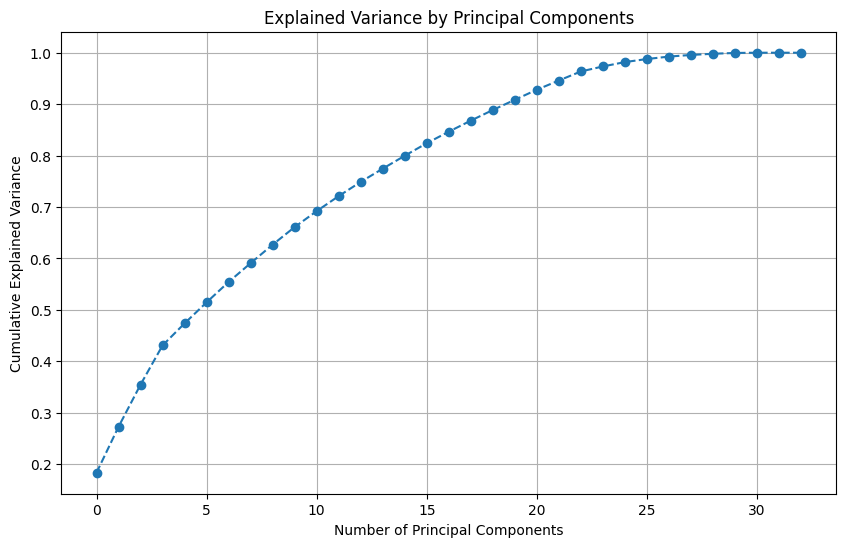

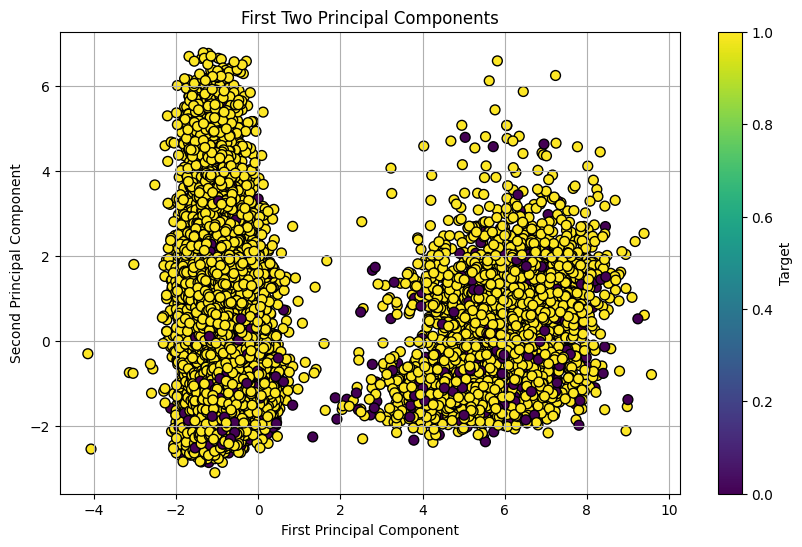

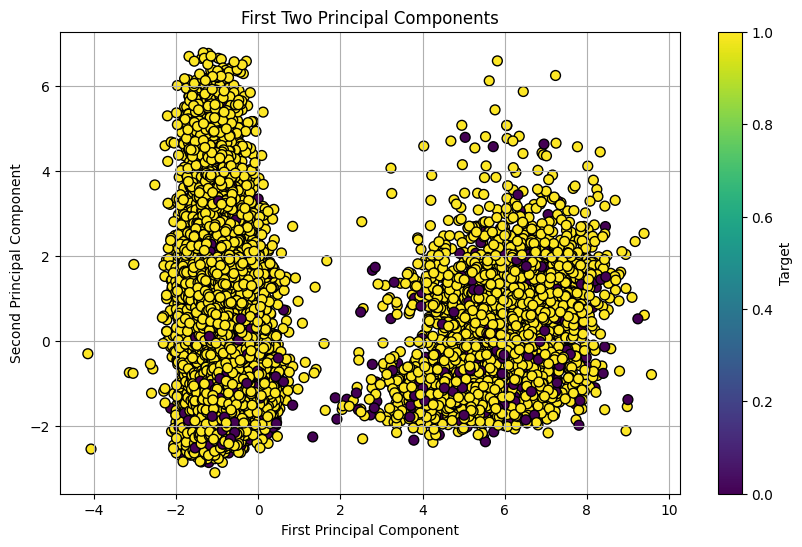

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Target')
plt.grid()
plt.show()

# Apply PCA with n_components to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# plot the variables in the first two principal components names in the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Target')
plt.grid()
plt.show()


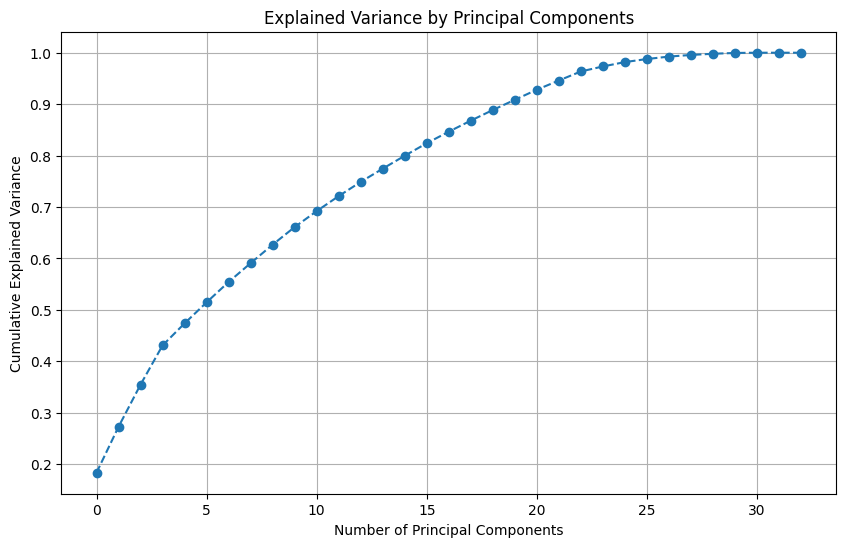

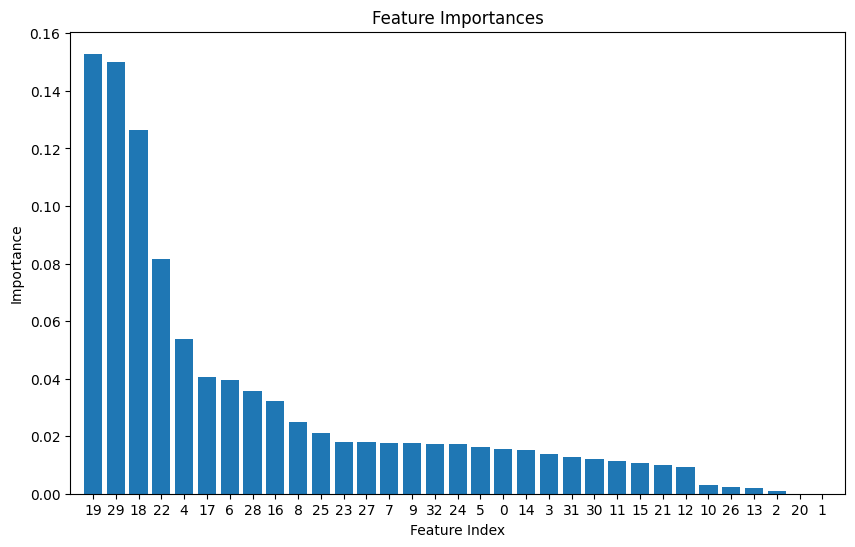

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Apply PCA with n_components to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Fit a Decision Tree classifier to identify important features
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_scaled, y)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X_scaled.shape[1]), importances[indices], align='center')
plt.title('Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.xticks(range(X_scaled.shape[1]), indices)
plt.xlim([-1, X_scaled.shape[1]])
plt.show()


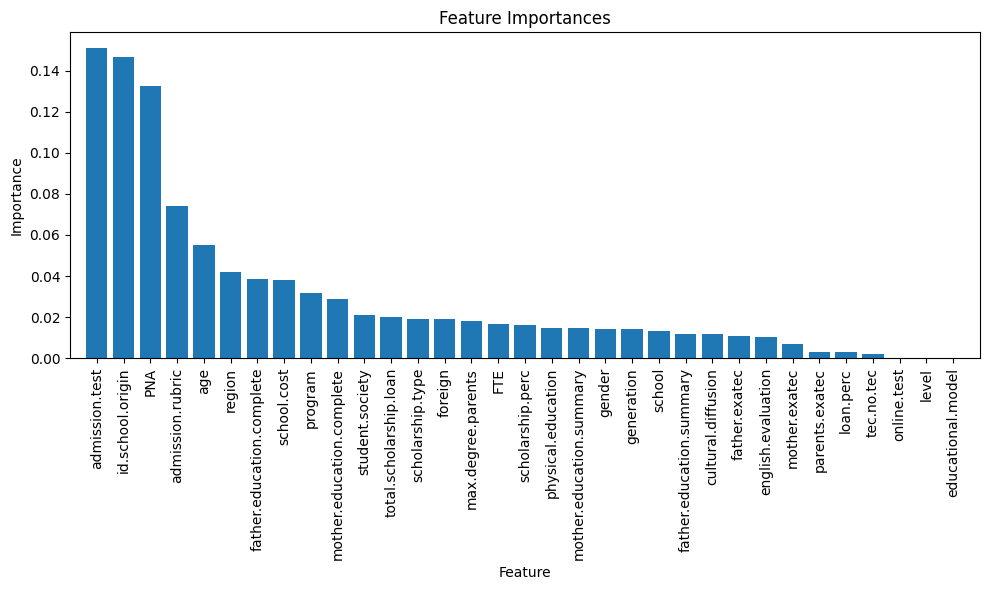

In [4]:
# Fit a Decision Tree classifier to identify important features
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_scaled, y)

# Get feature importances and corresponding feature names
importances = dt_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances and feature names
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_scaled.shape[1]), sorted_importances, align='center')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(range(X_scaled.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_scaled.shape[1]])
plt.tight_layout()
plt.show()


#export the data of feature importances
feature_importances = pd.DataFrame({'Feature': sorted_feature_names, 'Importance': sorted_importances})
feature_importances.to_csv('./data/feature_importances.csv', index=False)



Feature with the highest importance: admission.test
Importance value: 0.15104673178465983


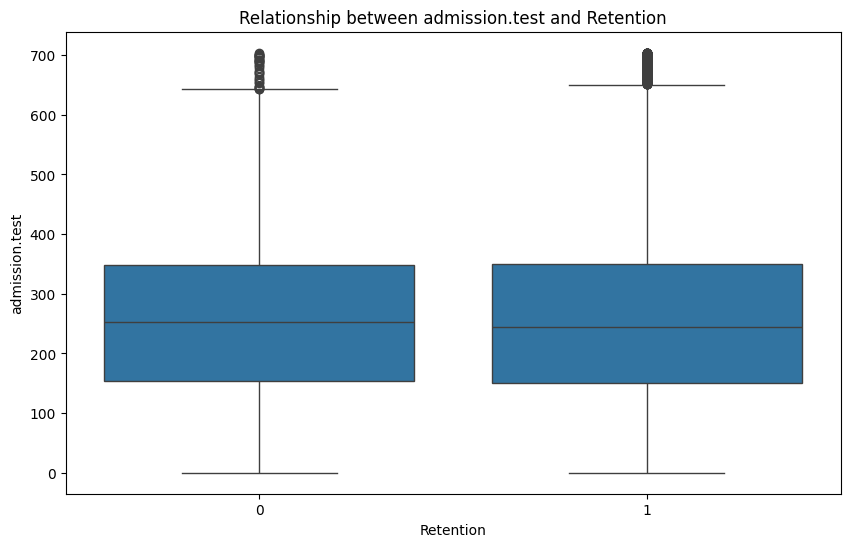

In [5]:
# Get feature importances and corresponding feature names
importances = dt_classifier.feature_importances_
feature_names = X.columns

# Find the index of the feature with the highest importance
highest_importance_index = np.argmax(importances)
highest_importance_feature = feature_names[highest_importance_index]
highest_importance_value = importances[highest_importance_index]

print("Feature with the highest importance:", highest_importance_feature)
print("Importance value:", highest_importance_value)

# Explore the relationship between the highest importance feature and the target variable
# For example, you can create a scatter plot or a box plot to visualize this relationship
# You can also calculate summary statistics or conduct hypothesis tests to analyze the impact

# For visualization:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X[highest_importance_feature])
plt.title(f'Relationship between {highest_importance_feature} and Retention')
plt.xlabel('Retention')
plt.ylabel(highest_importance_feature)
plt.show()


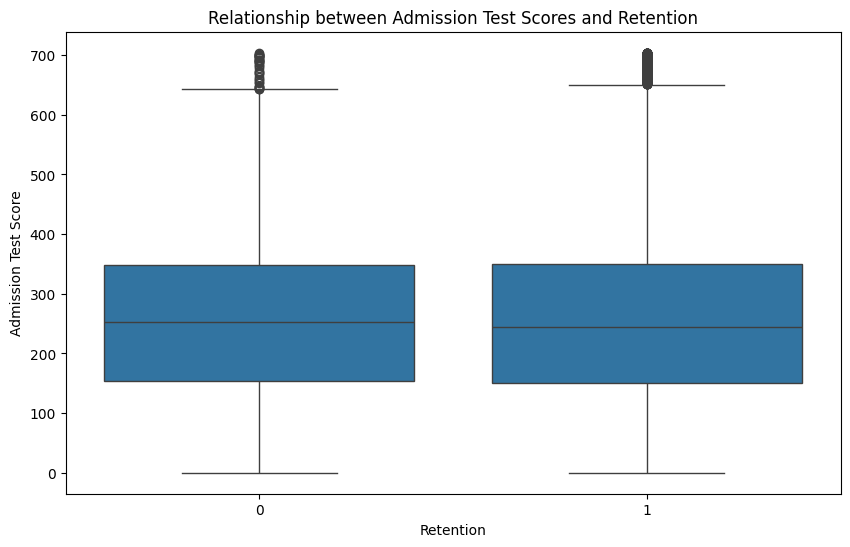

In [6]:
# For visualization:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X['admission.test'])
plt.title('Relationship between Admission Test Scores and Retention')
plt.xlabel('Retention')
plt.ylabel('Admission Test Score')
plt.show()


In [7]:

# Load the new data from the same file
new_data = pd.read_csv('./data/label_encoded_scaled_data.csv')

new_data = new_data.drop(['dropout.semester'], axis=1)

# Remove the 'retention' column from the new data
X_new = new_data.drop('retention', axis=1)

# Scale the features using the same scaler used during training
X_new_scaled = scaler.transform(X_new)  # Assuming 'scaler' is the scaler used during training

# Apply PCA transformation to the scaled features
X_new_pca = pca.transform(X_new_scaled)  # Assuming 'pca' is the PCA model fitted during training

# Predict retention status using the pre-trained model
predicted_retention_status = best_model.predict(X_new_pca)  # Assuming 'best_model' is the trained classifier

# Interpret the predictions
# Assuming 1 indicates retention and 0 indicates dropout
retained_students = new_data[predicted_retention_status == 1]
dropout_students = new_data[predicted_retention_status == 0]

# Calculate the percentage of retained and dropout students
percentage_retained = (len(retained_students) / len(new_data)) * 100
percentage_dropout = (len(dropout_students) / len(new_data)) * 100

print(f"Percentage of Retained Students: {percentage_retained:.2f}%")
print(f"Percentage of Dropout Students: {percentage_dropout:.2f}%")


NameError: name 'best_model' is not defined

In [ ]:

# Load the new data from the same file
new_data = pd.read_csv('./data/label_encoded_scaled_data.csv')

new_data = new_data.drop(['dropout.semester'], axis=1)

# Remove the 'retention' column from the new data
X_new = new_data.drop('retention', axis=1)

# Scale the features using the same scaler used during training
X_new_scaled = scaler.transform(X_new)  # Assuming 'scaler' is the scaler used during training

# Apply PCA transformation to the scaled features
X_new_pca = pca.transform(X_new_scaled)  # Assuming 'pca' is the PCA model fitted during training

# Predict retention status using the pre-trained model
predicted_retention_status = best_model.predict(X_new_pca)  # Assuming 'best_model' is the trained classifier

# Interpret the predictions
# Assuming 1 indicates retention and 0 indicates dropout
retained_students = new_data[predicted_retention_status == 1]
dropout_students = new_data[predicted_retention_status == 0]

# Calculate the percentage of retained and dropout students
percentage_retained = (len(retained_students) / len(new_data)) * 100
percentage_dropout = (len(dropout_students) / len(new_data)) * 100

print(f"Percentage of Retained Students: {percentage_retained:.2f}%")
print(f"Percentage of Dropout Students: {percentage_dropout:.2f}%")


Percentage of Retained Students: 99.97%
Percentage of Dropout Students: 0.03%
